# Feature Scaling

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

## Types of Feature Scaling:
### Standardization:
1. Standard Scaler


### Normalization:
1. Min Max Scaling
2. Mean Normalization
3. Max Absolute Scaling
4. Robust Scaling 

## 1. Standardization

It is a very effective technique which re-scales a feature value so that it has distribution with 0 mean value and variance equals to 1.It's more useful and common for classification tasks

StandardScaler is useful for the features that follow a Normal distribution.

                 x_scaled = x – mean/std_dev

In [1]:

import numpy as np
import pandas as pd


In [2]:
dataframe_1 = pd.DataFrame({
    'Income': [15000, 18000, 120000, 100000],
    'Age': [25, 28, 42, 53],
    'Department': ['HR','Legal','Marketing','Management']
})

In [3]:
dataframe_1

,Income,Age,Department
0,15000,25,HR
1,18000,28,Legal
2,120000,42,Marketing
3,100000,53,Management


In [4]:
col_names_1 = ['Income', 'Age']
features_1 = dataframe_1[col_names_1]

In [5]:
features_1

,Income,Age
0,15000,25
1,18000,28
2,120000,42
3,100000,53


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()



In [7]:
dataframe_1[col_names_1] = scaler.fit_transform(features_1.values)


In [8]:
dataframe_1

,Income,Age,Department
0,-1.020222,-1.066930,HR
1,-0.956788,-0.800198,Legal
2,1.199950,0.444554,Marketing
3,0.777060,1.422574,Management


## Normalization 

Normalization is a rescaling of the data from the original range so that all values are within the new range of 0 and 1.


## 2. MinMax Scaler

Attributes are often normalized to lie in a fixed range — usually from zero to one—by dividing all values by the maximum value encountered or by subtracting the minimum value and dividing by the range between the maximum and minimum values.

                        y = (x – min) / (max – min)

MinMaxScaler may be used when the upper and lower boundaries are well known from domain knowledge

In [9]:
dataframe_2 = pd.DataFrame({
    'Income': [15000, 18000, 120000, 100000],
    'Age': [25, 28, 42, 53],
    'Department': ['HR','Legal','Marketing','Management']
})

In [10]:
col_names_2 = ['Income', 'Age']
features_2 = dataframe_2[col_names_2]

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [12]:
dataframe_2[col_names_2] = scaler.fit_transform(features_2.values)

In [13]:
dataframe_2

,Income,Age,Department
0,0.000000,0.000000,HR
1,0.028571,0.107143,Legal
2,1.000000,0.607143,Marketing
3,0.809524,1.000000,Management


## 3. MaxAbsScaler

The MaxAbsScaler works very similarly to the MinMaxScaler but automatically scales the data to a [-1,1] range based on the absolute maximum. This scaler is meant for data that is already centered at zero or sparse data. It does not shift/center the data, and thus does not destroy any sparsity.This scaler can also be applied to sparse CSR or CSC matrices.

Max Absolute scaling will perform a lot better in sparse data or when most of the values are 0.

In [14]:
df_titanic= pd.read_csv("titanic.csv" ,usecols=["Age", "Fare"])


In [15]:
df_titanic["Fare"].fillna(value=df_titanic["Fare"].median(), inplace=True)

In [16]:
df_titanic.isnull().sum()

Age     177
Fare      0
dtype: int64

In [17]:
from sklearn.preprocessing import MaxAbsScaler

In [18]:
ma = MaxAbsScaler()

In [19]:
df_titanic_new = pd.DataFrame(ma.fit_transform(df_titanic), columns=df_titanic.columns) 

In [20]:
df_titanic_new.head(10)

,Age,Fare
0,0.2750,0.014151
1,0.4750,0.139136
2,0.3250,0.015469
3,0.4375,0.103644
4,0.4375,0.015713
5,NaN,0.016510
6,0.6750,0.101229
7,0.0250,0.041136
8,0.3375,0.021731
9,0.1750,0.058694


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(palette="Accent_r", style="darkgrid")
%matplotlib inline

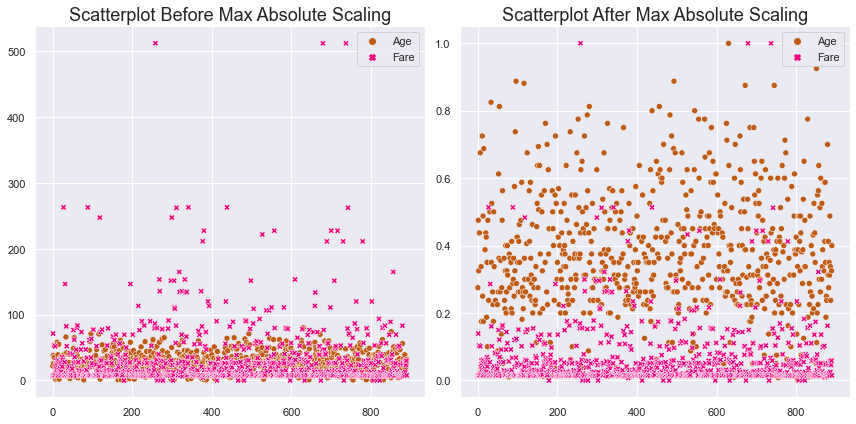

In [22]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Scatterplot Before Max Absolute Scaling", fontsize=18)
sns.scatterplot(data = df_titanic)
plt.subplot(1,2,2)
plt.title("Scatterplot After Max Absolute Scaling", fontsize=18)
sns.scatterplot(data = df_titanic_new)
plt.tight_layout()
plt.show()

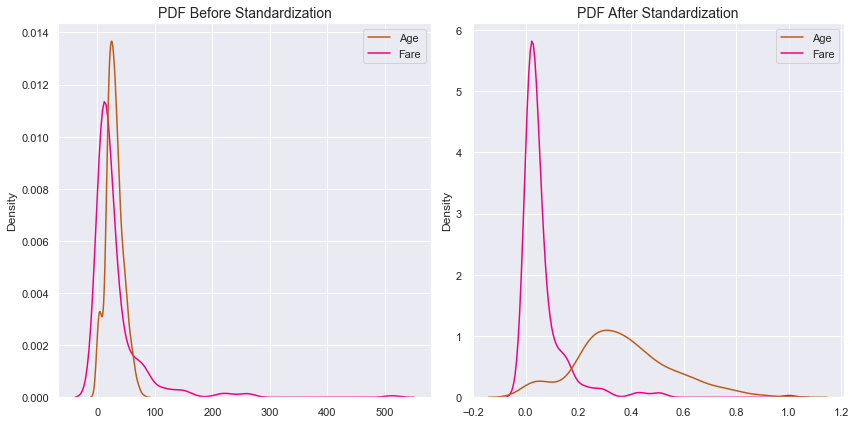

In [23]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("PDF Before Standardization", fontsize=14)
sns.kdeplot(data = df_titanic)
plt.subplot(1,2,2)
plt.title("PDF After Standardization", fontsize=14)
sns.kdeplot(data = df_titanic_new)
plt.tight_layout()
plt.show()

## 4.Robust Scaler


This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).
Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Median and interquartile range are then stored to be used on later data using the transform method

        value = (value – median) / (p75 – p25)

        x_scaled = (x – Q1)/(Q3 – Q1)

        IQR = Q3 – Q1

In [24]:
from sklearn.preprocessing import RobustScaler

In [25]:
rbs=RobustScaler()

In [26]:
df_titanic_new1 = pd.DataFrame(rbs.fit_transform(df_titanic), columns=df_titanic_new.columns)

In [27]:
df_titanic_new1

,Age,Fare
0,-0.335664,-0.312011
1,0.559441,2.461242
2,-0.111888,-0.282777
3,0.391608,1.673732
4,0.391608,-0.277363
...,...,...
886,-0.055944,-0.062981
887,-0.503497,0.673281
888,NaN,0.389604
889,-0.111888,0.673281


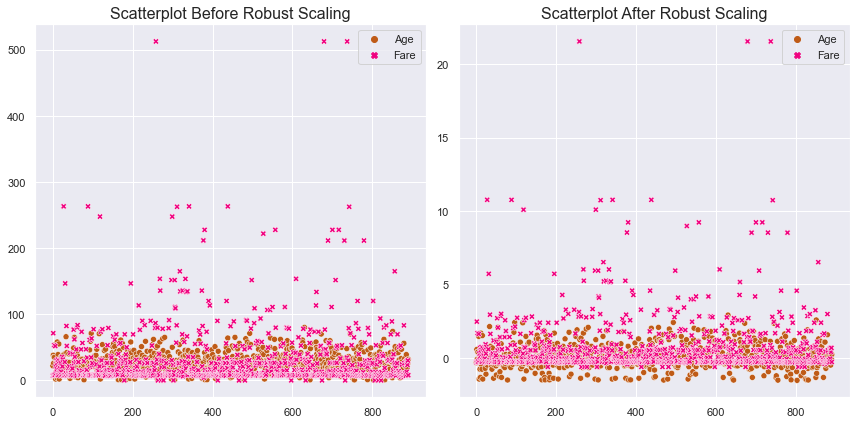

In [28]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Scatterplot Before Robust Scaling", fontsize=16)
sns.scatterplot(data = df_titanic)
plt.subplot(1,2,2)
plt.title("Scatterplot After Robust Scaling", fontsize=16)
sns.scatterplot(data = df_titanic_new1)
plt.tight_layout()
plt.show()

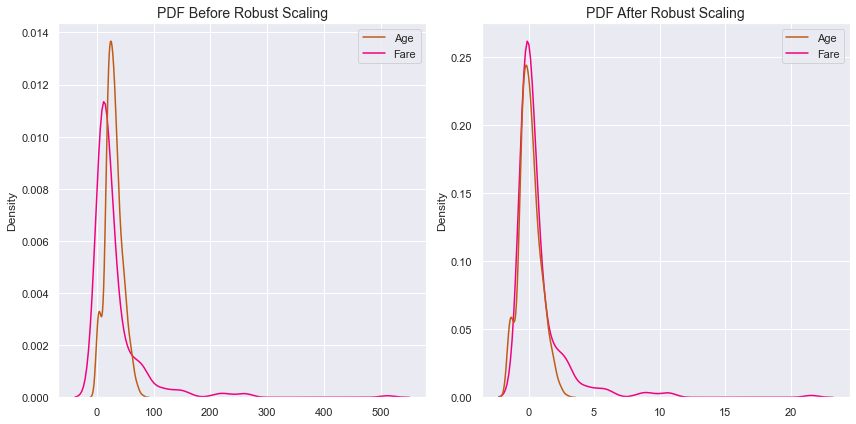

In [29]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("PDF Before Robust Scaling", fontsize=14)
sns.kdeplot(data = df_titanic, color="blue")
plt.subplot(1,2,2)
plt.title("PDF After Robust Scaling", fontsize=14)
sns.kdeplot(data = df_titanic_new1, color="red")
plt.tight_layout()
plt.show()

## 5.Quantile Transformer Scaler

- Transform features using quantiles information.

This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

- The transformation is applied on each feature independently
- First an estimate of the cumulative distribution function of a feature is used to map the original values to a uniform distribution
- The obtained values are then mapped to the desired output distribution using the associated quantile function. 
- Features values of new/unseen data that fall below or above the fitted range will be mapped to the bounds of the output distribution. Note that this transform is non-linear.
-  It may distort linear correlations between variables measured at the same scale but renders variables measured at different scales more directly comparable


In [30]:
from sklearn.preprocessing import QuantileTransformer

In [31]:
qn = QuantileTransformer(n_quantiles=10, random_state=0)

In [32]:
df_diabetes = pd.read_csv("diabetes.csv",usecols=["Glucose","BloodPressure","SkinThickness","BMI"])

In [33]:
df_diabetes

,Glucose,BloodPressure,SkinThickness,BMI
0,148,72,35,33.6
1,85,66,29,26.6
2,183,64,0,23.3
3,89,66,23,28.1
4,137,40,35,43.1
...,...,...,...,...
763,101,76,48,32.9
764,122,70,27,36.8
765,121,72,23,26.2
766,126,60,0,30.1


In [34]:
df_diabetes_new1= pd.DataFrame(qn.fit_transform(df_diabetes),columns=df_diabetes.columns)

In [35]:
df_diabetes_new1

,Glucose,BloodPressure,SkinThickness,BMI
0,0.799168,0.500000,0.809524,0.597980
1,0.108557,0.333333,0.643939,0.226852
2,0.948052,0.277778,0.000000,0.107870
3,0.133333,0.333333,0.509662,0.296296
4,0.722222,0.081967,0.809524,0.898691
...,...,...,...,...
763,0.277778,0.666667,0.903955,0.555556
764,0.555556,0.444444,0.598485,0.757709
765,0.544444,0.500000,0.509662,0.208889
766,0.611111,0.193651,0.000000,0.400000


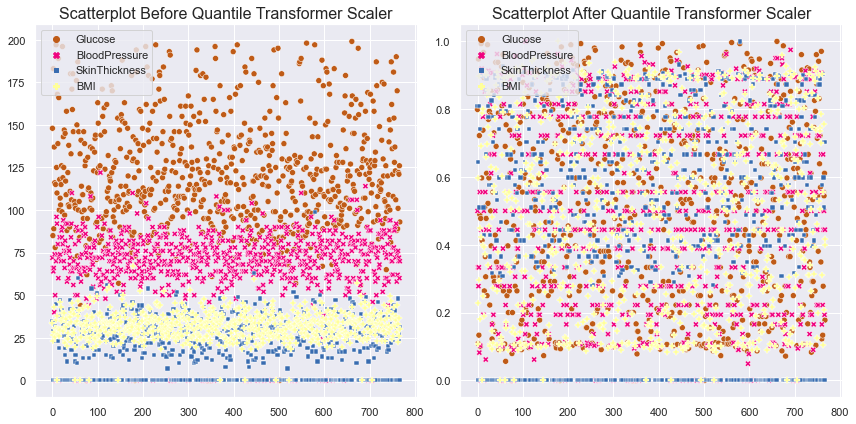

In [36]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Scatterplot Before Quantile Transformer Scaler", fontsize=16)
sns.scatterplot(data = df_diabetes)
plt.subplot(1,2,2)
plt.title("Scatterplot After Quantile Transformer Scaler", fontsize=16)
sns.scatterplot(data = df_diabetes_new1)
plt.tight_layout()
plt.show()

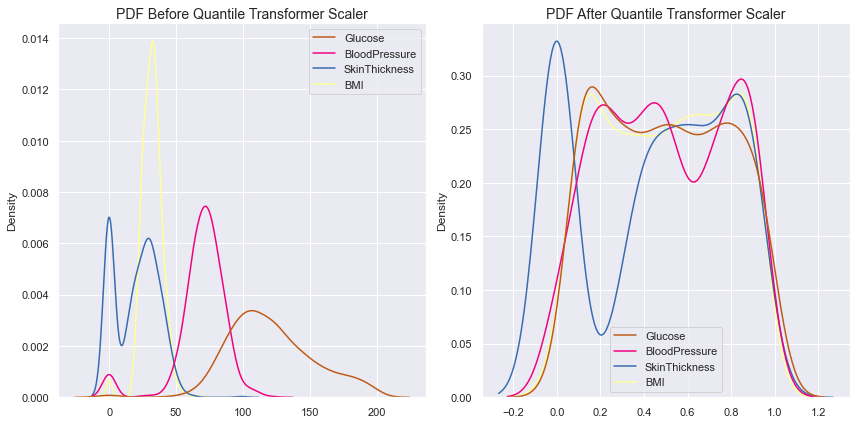

In [37]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("PDF Before Quantile Transformer Scaler", fontsize=14)
sns.kdeplot(data = df_diabetes)
plt.subplot(1,2,2)
plt.title("PDF After Quantile Transformer Scaler", fontsize=14)
sns.kdeplot(data = df_diabetes_new1)
plt.tight_layout()
plt.show()

## 6.Log Transform

The Log Transform is one of the most popular Transformation techniques out there. It is primarily used to convert a skewed distribution to a normal distribution/less-skewed distribution. 

In [38]:
import scipy.stats as stat
import seaborn as sns
import pylab

In [39]:
def plot_data(df,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.histplot(df[feature],kde=True)
    plt.subplot(1,2,2)
    stat.probplot(df[feature], dist='norm',plot=pylab)
    pylab.show()
    
    

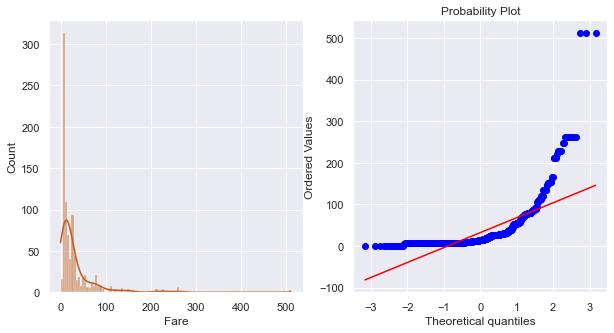

In [40]:
plot_data(df_titanic,'Fare')

In [41]:
df_titanic['log_Fare']=np.log(df_titanic['Fare'])

C:\Users\Prita\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\Users\Prita\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


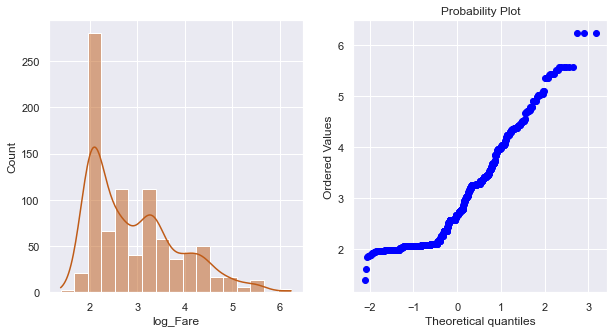

In [42]:
plot_data(df_titanic,'log_Fare')

## 7. Reciprocal Transformation


The reciprocal transformation is defined as the transformation of x to 1/x. The transformation has a dramatic effect on the shape of the distribution, reversing the order of values with the same sign. The transformation can only be used for non-zero values.

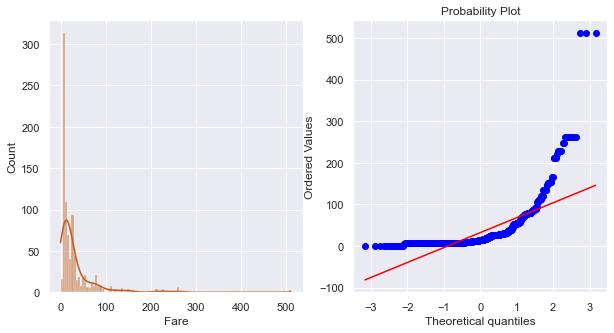

In [43]:
plot_data(df_titanic,'Fare')

In [44]:
df_titanic['Reciprocal_Fare']=np.reciprocal(df_titanic['Fare'])

C:\Users\Prita\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\Users\Prita\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


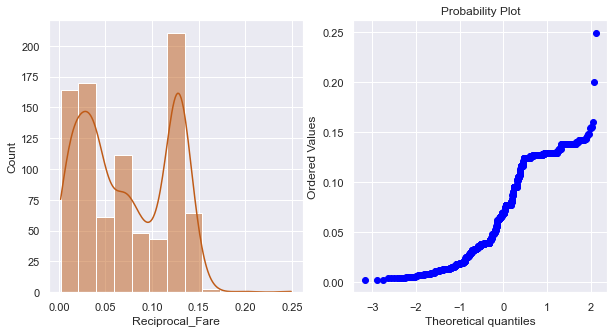

In [45]:
plot_data(df_titanic,'Reciprocal_Fare')

## 8.Square Root Transformation

In [46]:
df_titanic['Age_square'] = df_titanic.Age**(1/2)

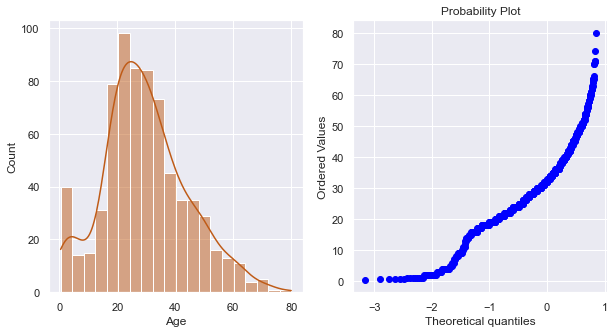

In [47]:
plot_data(df_titanic,'Age')

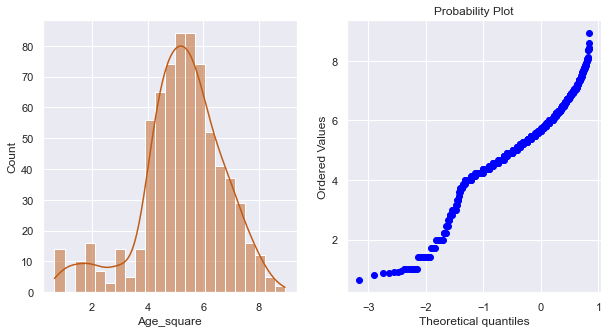

In [48]:
plot_data(df_titanic,'Age_square')

## 9.Power transforms

A Box Cox transformation is a transformation of non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn’t normal, applying a Box-Cox means that you are able to run a broader number of tests.

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform. The optimal parameter for stabilizing variance and minimizing skewness is estimated through maximum likelihood.

Box-Cox requires input data to be strictly positive, while Yeo-Johnson supports both positive or negative data.

By default, zero-mean, unit-variance normalization is applied to the transformed data

In [49]:
from sklearn.preprocessing import PowerTransformer

In [50]:
pt=PowerTransformer()

In [51]:
df_diabetes_transformed=pt.fit_transform(df_diabetes)

In [52]:
print(pt.lambdas_)

[0.96640477 1.60663147 0.51156636 1.27656634]


- If you do not understand the data, use standard scaler. It works most of the times.
- If you know the max and min values of the feature, then use min max scaler. Like in CNN.
- If most of the values in the feature column is 0 or sparce matrix, then use Max Absolute Scaling
- If the data has outliers, use Robust Scaling.